In [1]:
import pandas as pd
import os

In [2]:
# Adjusting the folder and file (using raw string)
# Warning: dir() is a bult in function in Python
tdir = r"C:\Users\henri\Documents\Henrique\Trabalho\Python\Pandas\Tutoriais"
file = "HistoricalQuotes_Amazon_1Y.csv"
ffile = tdir + "\\" + file

In [3]:
print(ffile)

C:\Users\henri\Documents\Henrique\Trabalho\Python\Pandas\Tutoriais\HistoricalQuotes_Amazon_1Y.csv


In [4]:
df = pd.read_csv(ffile)
df.head(5)

,Date,Close,Open,High,Low,Volume
0,2/28/2020,1883.75,1814.63,1889.76,1811.13,9493797
1,2/27/2020,1884.30,1934.38,1975.00,1882.76,8143993
2,2/26/2020,1979.59,1970.28,2014.67,1960.45,5240402
3,2/25/2020,1972.74,2026.42,2034.60,1958.42,6219094
4,2/24/2020,2009.29,2003.18,2039.30,1987.97,6546997


In [5]:
type(df.Date)

pandas.core.series.Series

In [6]:
type(df.Date[0])

str

In [7]:
df1 = pd.read_csv(ffile, parse_dates=["Date"])

In [8]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df2 = pd.read_csv(ffile, parse_dates=["Date"], index_col=["Date"])

In [10]:
df2.head(3)

,Close,Open,High,Low,Volume
Date,,,,,
2020-02-28,1883.75,1814.63,1889.76,1811.13,9493797
2020-02-27,1884.30,1934.38,1975.00,1882.76,8143993
2020-02-26,1979.59,1970.28,2014.67,1960.45,5240402


In [11]:
df2.index

DatetimeIndex(['2020-02-28', '2020-02-27', '2020-02-26', '2020-02-25',
               '2020-02-24', '2020-02-21', '2020-02-20', '2020-02-19',
               '2020-02-18', '2020-02-14',
               ...
               '2019-03-14', '2019-03-13', '2019-03-12', '2019-03-11',
               '2019-03-08', '2019-03-07', '2019-03-06', '2019-03-05',
               '2019-03-04', '2019-03-01'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [12]:
df2.columns   # See that there is an empty space before the title

Index([' Close', ' Open', ' High', ' Low', ' Volume'], dtype='object')

In [13]:
df2 = df2.rename(columns=lambda x: str(x).strip())

In [14]:
df2.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume'], dtype='object')

In [15]:
df2["2019-06"].Open.describe()

count      20.000000
mean     1853.170500
std        71.411723
min      1699.240000
25%      1807.425000
50%      1879.875000
75%      1908.155000
max      1933.330000
Name: Open, dtype: float64

In [16]:
df2["2019-06-10":"2019-06-01"]

,Close,Open,High,Low,Volume
Date,,,,,
2019-06-10,1860.63,1822.00,1884.87,1818.00,5371007
2019-06-07,1804.03,1763.70,1806.25,1759.49,4808246
2019-06-06,1754.36,1737.71,1760.00,1726.13,3689272
2019-06-05,1738.50,1749.60,1752.00,1715.25,4239782
2019-06-04,1729.56,1699.24,1730.82,1680.89,5679121
2019-06-03,1692.69,1760.01,1766.29,1672.00,9098708


In [17]:
# Resample: the current data is daily and we will resample for montly
df2.resample('M').mean()    # We could apply to 1 specific column

,Close,Open,High,Low,Volume
Date,,,,,
2019-03-31,1722.491905,1719.849048,1737.247619,1705.416190,4.764146e+06
2019-04-30,1866.202381,1863.626190,1874.405714,1850.939048,3.826060e+06
2019-05-31,1869.383182,1871.653182,1886.184545,1852.757727,4.464289e+06
2019-06-30,1852.617500,1853.170500,1868.867000,1835.976500,3.737329e+06
2019-07-31,1965.882273,1964.912727,1977.383182,1948.632727,3.326857e+06
2019-08-31,1793.645455,1799.372273,1810.570000,1778.234091,3.635888e+06
2019-09-30,1799.121000,1801.716000,1812.319500,1784.686000,3.100190e+06
2019-10-31,1752.331739,1749.137826,1763.666957,1736.604783,3.137663e+06
2019-11-30,1774.294000,1775.338000,1784.218500,1764.300500,2.603024e+06


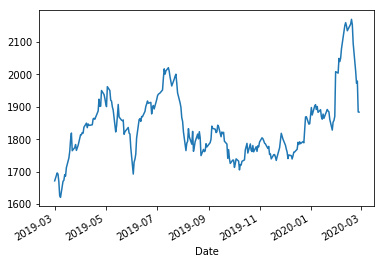

In [18]:
%matplotlib inline
df2.Close.plot()

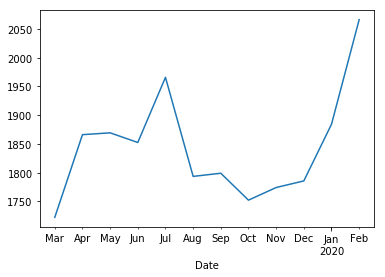

In [19]:
df2.Close.resample('M').mean().plot()    # We could apply different frequencies (D, M, W, etc)